In [1]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
consumerKey='iL2KI650FefaLUj8X8yh0xKmo'
consumerSecret='bHfmdHDc9wIifVW26Gw9XqAGhpS9XyRAe6HxxWXGzUDtkUf38o'
accessToken='1195745298582106112-EZi82yH3RTahSCBMToXBFlERp7Fxqu'
accessTokenSecret='Fjk9XgOT3y7nug3Z6VXNBQbXrD10HoXRIR52wVdbiGqR7'

In [3]:
auth= tweepy.OAuthHandler(consumerKey,consumerSecret)

auth.set_access_token(accessToken,accessTokenSecret)

api=tweepy.API(auth,wait_on_rate_limit=True)

In [4]:
#fetching the tweets
#fetching the new tweets
posts= tweepy.Cursor(api.search,q='coronavirus',lang="en").items(200)
i=1
#fetching the old tweets
oldposts=tweepy.Cursor(api.search,q='coronavirus',lang="en", since='2020-04-01').items(200)
#creating a data frame for old and new tweets
for tweet in posts:
    df= pd.DataFrame([tweet.text for tweet in posts],columns=['Tweets'])
    oldf= pd.DataFrame([tweet.text for tweet in oldposts],columns=['Tweets'])


In [5]:
oldf.head()

,Tweets
0,RT @TravelineCymru: Unfortunately we will not ...
1,RT @SkyNews: Coronavirus: Nottingham students ...
2,Jacob Rees-Mogg shames Andy Burnham's 'cheap p...
3,A question of time? Priorities and considerati...
4,RT @Joe_Mayes: The problem of a shortage of cu...


In [6]:
df.head()


,Tweets
0,RT @vietthanhsports: Obama delivers blazing cr...
1,RT @nycsouthpaw: It was an even more serious f...
2,Coronavirus vaccine: When will it be ready and...
3,RT @funder: Trump should be prosecuted for his...
4,White House task force document leaks highligh...


In [7]:
#cleaning the data
def cleanTxt(text):
    text=re.sub(r'@[A-Za-z0-9,.'']+','',text) #remove @mentions
    text=re.sub(r'#','',text) #Removing the # symbol
    text=re.sub(r'https?:\/\/\S+','',text)#remove hyperlink
    text=re.sub(r'RT[\s]+','',text)#removing RT
    
    return text
#cleaning the new data
df['Tweets']=df['Tweets'].apply(cleanTxt)

#show the cleaned text
df

,Tweets
0,: Obama delivers blazing critique of Trump in ...
1,": It was an even more serious failure for you,..."
2,Coronavirus vaccine: When will it be ready and...
3,: Trump should be prosecuted for his catastrop...
4,White House task force document leaks highligh...
...,...
194,": Opinion: McConnell helps ""working families"" ..."
195,: Is getting it yet? \n\nCoronavirus live new...
196,Important contribution from in “The implem...
197,": AstraZeneca trial volunteer dies in Brazil, ..."


In [8]:
#cleaning the old data
oldf['Tweets']=oldf['Tweets'].apply(cleanTxt)
#printing
oldf

,Tweets
0,: Unfortunately we will not be able to update ...
1,": Coronavirus: Nottingham students fined £40,0..."
2,Jacob Rees-Mogg shames Andy Burnham's 'cheap p...
3,A question of time? Priorities and considerati...
4,_Mayes: The problem of a shortage of customs a...
...,...
195,": Coronavirus: 400,000 children in England off..."
196,": BREAK: Sophie Wilmès, until this month the P..."
197,: BA parent company slashes passenger forecast...
198,: Following a phone call with the Health Secre...


In [9]:
#create a function to get subjectivity (to tell its a opinion or not)
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
#create a function for polarity (to tell its +ve or -ve)
def getPolarity(text):
    return TextBlob(text).sentiment.polarity
#create two new columns
df['Subjectivity']=df['Tweets'].apply(getSubjectivity)
df['Polarity']=df['Tweets'].apply(getPolarity)

df

,Tweets,Subjectivity,Polarity
0,: Obama delivers blazing critique of Trump in ...,0.000000,0.000000
1,": It was an even more serious failure for you,...",0.383333,-0.037500
2,Coronavirus vaccine: When will it be ready and...,0.500000,0.350000
3,: Trump should be prosecuted for his catastrop...,0.294643,-0.098214
4,White House task force document leaks highligh...,0.300000,-0.200000
...,...,...,...
194,": Opinion: McConnell helps ""working families"" ...",0.750000,0.375000
195,: Is getting it yet? \n\nCoronavirus live new...,0.277778,0.128788
196,Important contribution from in “The implem...,1.000000,0.400000
197,": AstraZeneca trial volunteer dies in Brazil, ...",0.000000,0.000000


In [10]:
def getAnalysis(score):
    if score <0:
        return 'Negative'
    elif score==0:
        return 'Neutral'
    else:
        return 'Positive'
df['Analysis']=df['Polarity'].apply(getAnalysis)

df

,Tweets,Subjectivity,Polarity,Analysis
0,: Obama delivers blazing critique of Trump in ...,0.000000,0.000000,Neutral
1,": It was an even more serious failure for you,...",0.383333,-0.037500,Negative
2,Coronavirus vaccine: When will it be ready and...,0.500000,0.350000,Positive
3,: Trump should be prosecuted for his catastrop...,0.294643,-0.098214,Negative
4,White House task force document leaks highligh...,0.300000,-0.200000,Negative
...,...,...,...,...
194,": Opinion: McConnell helps ""working families"" ...",0.750000,0.375000,Positive
195,: Is getting it yet? \n\nCoronavirus live new...,0.277778,0.128788,Positive
196,Important contribution from in “The implem...,1.000000,0.400000,Positive
197,": AstraZeneca trial volunteer dies in Brazil, ...",0.000000,0.000000,Neutral


In [11]:
oldf['Subjectivity']=oldf['Tweets'].apply(getSubjectivity)
oldf['Polarity']=oldf['Tweets'].apply(getPolarity)

oldf

,Tweets,Subjectivity,Polarity
0,: Unfortunately we will not be able to update ...,0.812500,0.000000
1,": Coronavirus: Nottingham students fined £40,0...",0.000000,0.000000
2,Jacob Rees-Mogg shames Andy Burnham's 'cheap p...,0.850000,0.033333
3,A question of time? Priorities and considerati...,0.000000,0.000000
4,_Mayes: The problem of a shortage of customs a...,0.088462,0.000000
...,...,...,...
195,": Coronavirus: 400,000 children in England off...",0.200000,0.200000
196,": BREAK: Sophie Wilmès, until this month the P...",0.262500,-0.062500
197,: BA parent company slashes passenger forecast...,0.000000,0.000000
198,: Following a phone call with the Health Secre...,0.500000,0.250000


In [13]:
oldf['Analysis']=oldf['Polarity'].apply(getAnalysis)
oldf

,Tweets,Subjectivity,Polarity,Analysis
0,: Unfortunately we will not be able to update ...,0.812500,0.000000,Neutral
1,": Coronavirus: Nottingham students fined £40,0...",0.000000,0.000000,Neutral
2,Jacob Rees-Mogg shames Andy Burnham's 'cheap p...,0.850000,0.033333,Positive
3,A question of time? Priorities and considerati...,0.000000,0.000000,Neutral
4,_Mayes: The problem of a shortage of customs a...,0.088462,0.000000,Neutral
...,...,...,...,...
195,": Coronavirus: 400,000 children in England off...",0.200000,0.200000,Positive
196,": BREAK: Sophie Wilmès, until this month the P...",0.262500,-0.062500,Negative
197,: BA parent company slashes passenger forecast...,0.000000,0.000000,Neutral
198,: Following a phone call with the Health Secre...,0.500000,0.250000,Positive


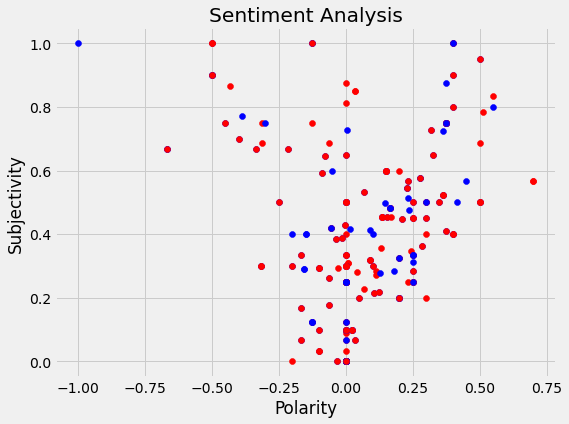

In [12]:
#ploting the polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i],color='Blue')
    plt.scatter(oldf['Polarity'][i],oldf['Subjectivity'][i],color='Red')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [14]:
ptweets=df[df.Analysis=='Positive']
ptweets=ptweets['Tweets']

round( (ptweets.shape[0]/df.shape[0])*100,1)

42.7

In [15]:
ptweets=df[df.Analysis=='Negative']
ptweets=ptweets['Tweets']

round( (ptweets.shape[0]/df.shape[0])*100,1)

23.1

In [16]:
ptweets=df[df.Analysis=='Neutral']
ptweets=ptweets['Tweets']

round( (ptweets.shape[0]/df.shape[0])*100,1)

34.2

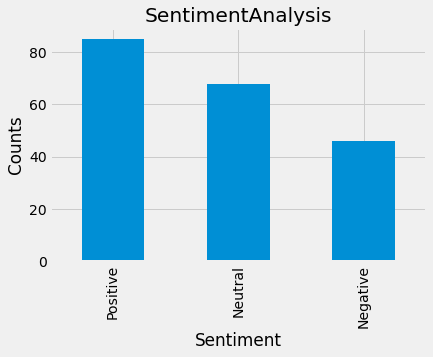

In [24]:
df['Analysis'].value_counts()

plt.title('SentimentAnalysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()

In [19]:
ptweets=oldf[oldf.Analysis=='Negative']
ptweets=ptweets['Tweets']

round( (ptweets.shape[0]/oldf.shape[0])*100,1)

19.5

In [20]:
ptweets=oldf[oldf.Analysis=='Neutral']
ptweets=ptweets['Tweets']

round( (ptweets.shape[0]/oldf.shape[0])*100,1)

40.0

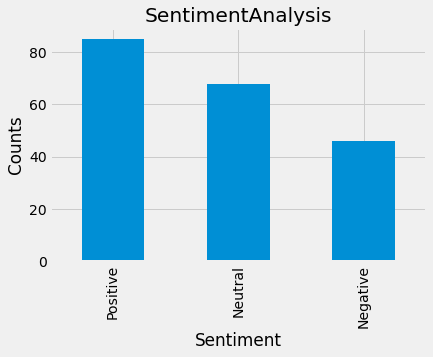

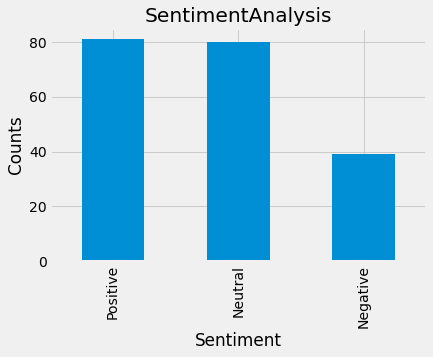

In [23]:
oldf['Analysis'].value_counts()

plt.title('SentimentAnalysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
oldf['Analysis'].value_counts().plot(kind='bar')
plt.show()